In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
#import category_encoders as ce
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\qingy\\Desktop\\STA 2453\\Data Analysis'

In [3]:
realtor = pd.read_csv(os.path.join(os.getcwd(), 'realtor.csv'))
realtor.shape

(1761, 68)

In [4]:
realtor.head()

,Address1,Address2,propertyID,listingID,propertyType,price,leasePrice,buildingType,neighbourhood,bathrooms,...,Cooling,Heating Type,Exterior Finish,Pool Type,Community Features,Amenities Nearby,Maintenance Fees,Maintenance Management Company,Total Parking Spaces,rooms_info
0,#1407 -5444 YONGE ST,"Toronto, Ontario M2N6J4",23762142,C5411047,SingleFamily,1499999.0,NaN,Apartment,NaN,2,...,Central air conditioning,Forced air (Natural gas),Concrete,"Indoor pool, Outdoor pool",NaN,NaN,"$1,528 (CAD) Monthly",Del Property Management,4.0,{'Main level': {'Living room': '7.3 m x 3.95 m...
1,#606 -300 BALLIOL ST,"Toronto, Ontario M4S3G6",23790906,C5420731,SingleFamily,548800.0,NaN,Apartment,NaN,1,...,Central air conditioning,Heat Pump (Electric),Brick,NaN,School Bus,"Park, Public Transit",$375 (CAD) Monthly,Goldview Property Management Ltd. 416-630-1234,NaN,{'Main level': {'Living room': '5.18 m x 3.05 ...
2,#1207 -5 PARKWAY FOREST DR,"Toronto, Ontario M2J1L2",23834601,C5435290,SingleFamily,549000.0,NaN,Apartment,NaN,1,...,Window air conditioner,Baseboard heaters (Electric),Brick,NaN,NaN,NaN,$674.85 (CAD) Monthly,Tech Lasi Management Service Tel 416-491-4441,1.0,{'Main level': {'Living room': '6.02 m x 3.17 ...
3,#404 -55 WELLESLEY ST E,"Toronto, Ontario M4Y2T6",23788958,C5419896,SingleFamily,939000.0,NaN,Apartment,NaN,2,...,Central air conditioning,Heat Pump (Electric),Brick,NaN,NaN,NaN,"$1,252.96 (CAD) Monthly",Community First Developments. Comfield Managem...,2.0,"{'Main level': {'Foyer': '2.5 m x 1.7 m', 'Liv..."
4,#1707 -375 KING ST W,"Toronto, Ontario M5V1K1",23801653,C5424009,SingleFamily,849000.0,NaN,Apartment,NaN,2,...,Central air conditioning,Forced air (Natural gas),Concrete,NaN,NaN,NaN,$594.63 (CAD) Monthly,Crossbridge Condominium Services - 416-979-0009,NaN,"{'Other': {'Living room': '7.2 m x 3.7 m', 'Di..."


In [5]:
# Display columns
print(realtor.columns.tolist())

['Address1', 'Address2', 'propertyID', 'listingID', 'propertyType', 'price', 'leasePrice', 'buildingType', 'neighbourhood', 'bathrooms', 'bedrooms', 'communityFeatures', 'nearbyAmenities', 'storeys', 'walkscore', 'transitscore', 'machineryIncluded', 'rentalEquipment', 'parkingType', 'majorBusinessType', 'minorBusinessType', 'totalUnits', 'landSize', 'zoningType', 'interiorFloorSpace', 'exteriorBuildingSize', 'franchise', 'buildingAmenities', 'buildingStyle', 'basementDevelopment', 'notificationUpdate', 'anchor', 'retailStorefront', 'clearCeilingHeight', 'hasphoto', 'photos', 'multimediaFeatures', 'listingVideoType', 'city', 'province', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Time on REALTOR.ca', 'Above Grade', 'Total', 'Features', 'Building Amenities', 'Cooling', 'Heating T

In [6]:
col_type = realtor.dtypes
col_type

Address1                           object
Address2                           object
propertyID                          int64
listingID                          object
propertyType                       object
                                   ...   
Amenities Nearby                   object
Maintenance Fees                   object
Maintenance Management Company     object
Total Parking Spaces              float64
rooms_info                         object
Length: 68, dtype: object

In [7]:
realtor.describe().astype(float)

,propertyID,price,leasePrice,bathrooms,bedrooms,storeys,walkscore,transitscore,machineryIncluded,majorBusinessType,...,totalUnits,zoningType,franchise,anchor,retailStorefront,clearCeilingHeight,photos,Above Grade,Total,Total Parking Spaces
count,1.761000e+03,1.761000e+03,0.0,1761.000000,1753.000000,175.000000,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,1761.000000,1696.000000,1761.000000,1356.000000
mean,2.380492e+07,8.891246e+05,NaN,1.666099,2.063890,2.120000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,24.356616,1.720519,1.666099,1.305310
std,2.704377e+04,7.261156e+05,NaN,0.720506,0.842928,0.662978,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,10.514439,0.703772,0.720506,4.067294
min,2.374625e+07,1.000000e+00,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
25%,2.378453e+07,5.888000e+05,NaN,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,17.000000,1.000000,1.000000,1.000000
50%,2.380984e+07,6.999000e+05,NaN,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,25.000000,2.000000,2.000000,1.000000
75%,2.382917e+07,9.200000e+05,NaN,2.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,33.000000,2.000000,2.000000,1.000000
max,2.384166e+07,1.029900e+07,NaN,6.000000,6.000000,3.000000,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,45.000000,5.000000,6.000000,107.000000


In [8]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['Address1', 'Address2', 'listingID', 'propertyType', 'buildingType', 'neighbourhood', 'communityFeatures', 'nearbyAmenities', 'rentalEquipment', 'parkingType', 'landSize', 'interiorFloorSpace', 'exteriorBuildingSize', 'buildingAmenities', 'buildingStyle', 'basementDevelopment', 'notificationUpdate', 'hasphoto', 'multimediaFeatures', 'listingVideoType', 'city', 'province', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Time on REALTOR.ca', 'Features', 'Building Amenities', 'Cooling', 'Heating Type', 'Exterior Finish', 'Pool Type', 'Community Features', 'Amenities Nearby', 'Maintenance Fees', 'Maintenance Management Company', 'rooms_info']


In [9]:
var_num = col_type[col_type!='object'].index.tolist()
print(var_num)

['propertyID', 'price', 'leasePrice', 'bathrooms', 'bedrooms', 'storeys', 'walkscore', 'transitscore', 'machineryIncluded', 'majorBusinessType', 'minorBusinessType', 'totalUnits', 'zoningType', 'franchise', 'anchor', 'retailStorefront', 'clearCeilingHeight', 'photos', 'Above Grade', 'Total', 'Total Parking Spaces']


In [10]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(realtor[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - Address1:
#1407 -5444 YONGE ST          1
#619 -801 KING ST W           1
11 WILLIAM POOLE WAY          1
#1414 -1 ROWNTREE RD          1
#402 -645 MILLWOOD RD         1
                             ..
#2903 -183 WELLINGTON ST W    1
#758 -313 RICHMOND ST E       1
#611 -75 EMMETT  AVE          1
#512 -88 GRANDVIEW WAY        1
#604 -25 GRENVILLE ST         1
Name: Address1, Length: 1761, dtype: int64
-------------------------------------------------------

1 - Address2:
Toronto, Ontario M2J1M5    19
Toronto, Ontario           19
Toronto, Ontario M5B0C3    10
Toronto, Ontario M5J2Z2     8
Toronto, Ontario M5V0S2     8
                           ..
Toronto, Ontario M1J3N4     1
Toronto, Ontario M5T2E5     1
Toronto, Ontario M5T0E1     1
Toronto, Ontario M6S2A2     1
Toronto, Ontario M3J1M3     1
Name: Address2, Length: 1023, dtype: int64
-------------------------------------------------------

2 - listingID:
C5411047    1
C5436159    1
C5429066    1
W5419741    1
C5437709    1
     

#### Check Missing Values

In [11]:
realtor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address1                        1761 non-null   object 
 1   Address2                        1761 non-null   object 
 2   propertyID                      1761 non-null   int64  
 3   listingID                       1761 non-null   object 
 4   propertyType                    1761 non-null   object 
 5   price                           1761 non-null   float64
 6   leasePrice                      0 non-null      float64
 7   buildingType                    1754 non-null   object 
 8   neighbourhood                   1 non-null      object 
 9   bathrooms                       1761 non-null   int64  
 10  bedrooms                        1753 non-null   float64
 11  communityFeatures               391 non-null    object 
 12  nearbyAmenities                 11

In [12]:
for var in var_cat:
    realtor.loc[realtor[var]=='', var] = np.nan

Missing summary

In [13]:
# missing summary
MissingSummary = pd.concat([realtor.dtypes, realtor.isnull().any(axis=0), realtor.isnull().sum(axis=0)], 
                           axis=1)
# The axis to concatenate along
MissingSummary.columns = ['FeatureType','IsMissing', 'MissingCnt']
MissingSummary

,FeatureType,IsMissing,MissingCnt
Address1,object,False,0
Address2,object,False,0
propertyID,int64,False,0
listingID,object,False,0
propertyType,object,False,0
...,...,...,...
Amenities Nearby,object,True,581
Maintenance Fees,object,True,33
Maintenance Management Company,object,True,47
Total Parking Spaces,float64,True,405


In [14]:
DropColumn = MissingSummary[(MissingSummary.MissingCnt/realtor.shape[0]>0.2)].index.tolist()
DropColumn

['leasePrice',
 'neighbourhood',
 'communityFeatures',
 'nearbyAmenities',
 'storeys',
 'walkscore',
 'transitscore',
 'machineryIncluded',
 'rentalEquipment',
 'majorBusinessType',
 'minorBusinessType',
 'totalUnits',
 'landSize',
 'zoningType',
 'interiorFloorSpace',
 'exteriorBuildingSize',
 'franchise',
 'buildingStyle',
 'basementDevelopment',
 'anchor',
 'retailStorefront',
 'clearCeilingHeight',
 'listingVideoType',
 'Features',
 'Pool Type',
 'Community Features',
 'Amenities Nearby',
 'Total Parking Spaces']

In [15]:
realtor_copy = realtor.copy()

In [16]:
realtor = realtor.drop(DropColumn, axis=1)
realtor.shape

(1761, 40)

#### Drop duplicate columns & Insignificant Columns

In [17]:
dup_col = ['propertyType', 'buildingType', 'parkingType', 'buildingAmenities', 'Above Grade', 'Total']
# also drop province since all condo are in Ontario
useless_col = ['Address1', 'Address2', 'province', 'propertyID', 'listingID', 'notificationUpdate', 'hasphoto', 'photos','Time on REALTOR.ca', 'multimediaFeatures', 'soldData', 'hasAlternateFeatureSheet', 'hasOpenHouse', 'hasVirtualOpenHouse', 'hasCMHCFTHBBanner', 'hasTDpreApprovalIcon', 'hasActiveVirtualOpenHouse']

In [18]:
realtor = realtor.drop(dup_col, axis=1)
realtor = realtor.drop(useless_col, axis=1)
realtor.shape

(1761, 17)

In [19]:
realtor.columns

Index(['price', 'bathrooms', 'bedrooms', 'city', 'Property Type',
       'Building Type', 'Community Name', 'Title', 'Annual Property Taxes',
       'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type',
       'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company',
       'rooms_info'],
      dtype='object')

#### Drop rows if features are missing

In [20]:
realtor = realtor.dropna()
realtor = realtor.reset_index(drop=True)
realtor.shape

(1245, 17)

### Overview the cleaned dataset

In [21]:
col_type = realtor.dtypes
col_type

price                             float64
bathrooms                           int64
bedrooms                          float64
city                               object
Property Type                      object
Building Type                      object
Community Name                     object
Title                              object
Annual Property Taxes              object
Parking Type                       object
Building Amenities                 object
Cooling                            object
Heating Type                       object
Exterior Finish                    object
Maintenance Fees                   object
Maintenance Management Company     object
rooms_info                         object
dtype: object

In [22]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['city', 'Property Type', 'Building Type', 'Community Name', 'Title', 'Annual Property Taxes', 'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type', 'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company', 'rooms_info']


In [23]:
var_num = col_type[col_type!='object'].index.tolist()
print(var_num)

['price', 'bathrooms', 'bedrooms']


In [24]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(realtor[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - city:
Toronto    1245
Name: city, dtype: int64
-------------------------------------------------------

1 - Property Type:
Single Family    1245
Name: Property Type, dtype: int64
-------------------------------------------------------

2 - Building Type:
Apartment          1193
Row / Townhouse      52
Name: Building Type, dtype: int64
-------------------------------------------------------

3 - Community Name:
Waterfront Communities C1    176
Church-Yonge Corridor         93
Niagara                       68
Bay Street Corridor           66
Mimico                        66
                            ... 
Humbermede                     1
Humberlea-Pelmo Park W5        1
Weston-Pellam Park             1
Junction Area                  1
East York                      1
Name: Community Name, Length: 115, dtype: int64
-------------------------------------------------------

4 - Title:
Condominium/Strata        1225
Undivided Co-ownership      10
Shares in Co-operative      10
Name: Titl

#### Convert Annual Property Tax & Maintenance Fees to numeric

In [25]:
## helper function
def get_fee(string):
    fee = float(string.replace(',','').split()[0].split("$")[1])
    return fee

In [26]:
realtor['num_property_tax'] = realtor['Annual Property Taxes'].apply(get_fee)
realtor['num_maintenance_fee'] = realtor['Maintenance Fees'].apply(get_fee)

In [27]:
clean_realtor = realtor.copy()
clean_realtor.head()

,price,bathrooms,bedrooms,city,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,Building Amenities,Cooling,Heating Type,Exterior Finish,Maintenance Fees,Maintenance Management Company,rooms_info,num_property_tax,num_maintenance_fee
0,1499999.0,2,2.0,Toronto,Single Family,Apartment,Willowdale West,Condominium/Strata,"$3,623 (CAD)",Underground,"Security/Concierge, Exercise Centre",Central air conditioning,Forced air (Natural gas),Concrete,"$1,528 (CAD) Monthly",Del Property Management,{'Main level': {'Living room': '7.3 m x 3.95 m...,3623.00,1528.00
1,548800.0,1,1.0,Toronto,Single Family,Apartment,Mount Pleasant West,Condominium/Strata,"$1,912.47 (CAD)",Visitor Parking,"Storage - Locker, Party Room, Exercise Centre",Central air conditioning,Heat Pump (Electric),Brick,$375 (CAD) Monthly,Goldview Property Management Ltd. 416-630-1234,{'Main level': {'Living room': '5.18 m x 3.05 ...,1912.47,375.00
2,939000.0,2,2.0,Toronto,Single Family,Apartment,Church-Yonge Corridor,Condominium/Strata,"$3,207.82 (CAD)","Underground, Visitor Parking","Storage - Locker, Car Wash, Party Room",Central air conditioning,Heat Pump (Electric),Brick,"$1,252.96 (CAD) Monthly",Community First Developments. Comfield Managem...,"{'Main level': {'Foyer': '2.5 m x 1.7 m', 'Liv...",3207.82,1252.96
3,849000.0,2,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$3,250.59 (CAD)",Underground,"Security/Concierge, Sauna, Exercise Centre, Re...",Central air conditioning,Forced air (Natural gas),Concrete,$594.63 (CAD) Monthly,Crossbridge Condominium Services - 416-979-0009,"{'Other': {'Living room': '7.2 m x 3.7 m', 'Di...",3250.59,594.63
4,749000.0,1,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$2,712.90 (CAD)","Underground, Visitor Parking","Storage - Locker, Security/Concierge, Exercise...",Central air conditioning,Forced air (Natural gas),Concrete,$429.60 (CAD) Monthly,Del Property Management,"{'Flat': {'Living room': '6 m x 3 m', 'Kitchen...",2712.90,429.60


#### Categorical Variable Encoding
Reference: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/  

Target Encoding: https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

In [28]:
# Building Type: 2 - one hot
# Community Name: popular 5, save others as Other (Waterfront, Church-Yonge, Niagara, Bay, Mimico, Other) 
# Title: 3 - dummy encoding
# Parking Type: create new dummy columns (Underground, Visitor, Garage)
# Building Amenities: new dummy columns (Storage, Security, Party, Exercise)
# Cooling: 3 - dummy encoding
# Heating: new (Forced, Pump)
# Exterior Finish: new (Concrete, Brick)
# Maintenance Management Company: new (Del, First Service Residential, Crossbridge, Icon, Duka)

In [29]:
## helper functions for reorganize categorical variables
def get_community(comm):
    if "Waterfront" in comm:
        return "Waterfront"
    elif "Church-Yonge" in comm:
        return "Church-Yonge"
    elif "Niagara" in comm:
        return "Niagara"
    elif "Bay " in comm:
        return "Bay"
    elif "Mimico" in comm:
        return "Mimico"
    else: 
        return "Other"
    
def heat_mech(heat):
    if "Forced air" in heat:
        return "Forced air"
    elif "Heat Pump" in heat:
        return "Heat Pump"
    else:
        return "Other"
    
def heat_material(heat):
    if "Natural gas" in heat:
        return "Natural gas"
    elif "Electric" in heat:
        return "Electric"
    else:
        return "Other"
    
def get_ManageComp(comp):
    if "Del" in comp:
        return "Del"
    elif "First Service Residential" in comp:
        return "First Service Residential"
    elif "Crossbridge" in comp:
        return "Crossbridge"
    elif "Icon " in comp:
        return "Icon"
    elif "Duka" in comp:
        return "Duka"
    else: 
        return "Other"
    
def find_str(element, string):
    if string in element:
        return 1
    else:
        return 0

In [30]:
# 
realtor['community'] = realtor['Community Name'].apply(get_community)
realtor['heat_mech'] = realtor['Heating Type'].apply(heat_mech)
realtor['heat_material'] = realtor['Heating Type'].apply(heat_material)
realtor['ManageComp'] = realtor['Maintenance Management Company'].apply(get_ManageComp)

In [31]:
clean_realtor2 = realtor.copy()
clean_realtor2.head()

,price,bathrooms,bedrooms,city,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,...,Exterior Finish,Maintenance Fees,Maintenance Management Company,rooms_info,num_property_tax,num_maintenance_fee,community,heat_mech,heat_material,ManageComp
0,1499999.0,2,2.0,Toronto,Single Family,Apartment,Willowdale West,Condominium/Strata,"$3,623 (CAD)",Underground,...,Concrete,"$1,528 (CAD) Monthly",Del Property Management,{'Main level': {'Living room': '7.3 m x 3.95 m...,3623.00,1528.00,Other,Forced air,Natural gas,Del
1,548800.0,1,1.0,Toronto,Single Family,Apartment,Mount Pleasant West,Condominium/Strata,"$1,912.47 (CAD)",Visitor Parking,...,Brick,$375 (CAD) Monthly,Goldview Property Management Ltd. 416-630-1234,{'Main level': {'Living room': '5.18 m x 3.05 ...,1912.47,375.00,Other,Heat Pump,Electric,Other
2,939000.0,2,2.0,Toronto,Single Family,Apartment,Church-Yonge Corridor,Condominium/Strata,"$3,207.82 (CAD)","Underground, Visitor Parking",...,Brick,"$1,252.96 (CAD) Monthly",Community First Developments. Comfield Managem...,"{'Main level': {'Foyer': '2.5 m x 1.7 m', 'Liv...",3207.82,1252.96,Church-Yonge,Heat Pump,Electric,Other
3,849000.0,2,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$3,250.59 (CAD)",Underground,...,Concrete,$594.63 (CAD) Monthly,Crossbridge Condominium Services - 416-979-0009,"{'Other': {'Living room': '7.2 m x 3.7 m', 'Di...",3250.59,594.63,Waterfront,Forced air,Natural gas,Crossbridge
4,749000.0,1,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$2,712.90 (CAD)","Underground, Visitor Parking",...,Concrete,$429.60 (CAD) Monthly,Del Property Management,"{'Flat': {'Living room': '6 m x 3 m', 'Kitchen...",2712.90,429.60,Waterfront,Forced air,Natural gas,Del


In [32]:
# Parking Type: 
realtor['park_Underground'] = realtor.apply(lambda x: find_str(x['Parking Type'], 'Underground'), axis=1)
realtor['park_Visitor'] = realtor.apply(lambda x: find_str(x['Parking Type'], 'Visitor'), axis=1)
realtor['park_Garage'] = realtor.apply(lambda x: find_str(x['Parking Type'], 'Garage'), axis=1)
# Building Amenities: (Storage, Security, Party, Exercise)
realtor['amenity_Storage'] = realtor.apply(lambda x: find_str(x['Building Amenities'], 'Storage'), axis=1)
realtor['amenity_Security'] = realtor.apply(lambda x: find_str(x['Building Amenities'], 'Security'), axis=1)
realtor['amenity_Party'] = realtor.apply(lambda x: find_str(x['Building Amenities'], 'Party'), axis=1)
realtor['amenity_Exercise'] = realtor.apply(lambda x: find_str(x['Building Amenities'], 'Exercise'), axis=1)
# Exterior Finish: new (Concrete, Brick)
realtor['exterior_Concrete'] = realtor.apply(lambda x: find_str(x['Exterior Finish'], 'Concrete'), axis=1)
realtor['exterior_Brick'] = realtor.apply(lambda x: find_str(x['Exterior Finish'], 'Brick'), axis=1)
# Building Type
realtor['type_Apartment'] = realtor.apply(lambda x: find_str(x['Building Type'], 'Apartment'), axis=1)
# Title: 3 - dummy encoding
realtor['title_Condominium'] = realtor.apply(lambda x: find_str(x['Title'], 'Condominium'), axis=1)
# Cooling: 3 - dummy encoding
realtor['cool_Central_air'] = realtor.apply(lambda x: find_str(x['Cooling'], 'Central air'), axis=1)

In [33]:
realtor.head()

,price,bathrooms,bedrooms,city,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,...,park_Garage,amenity_Storage,amenity_Security,amenity_Party,amenity_Exercise,exterior_Concrete,exterior_Brick,type_Apartment,title_Condominium,cool_Central_air
0,1499999.0,2,2.0,Toronto,Single Family,Apartment,Willowdale West,Condominium/Strata,"$3,623 (CAD)",Underground,...,0,0,1,0,1,1,0,1,1,1
1,548800.0,1,1.0,Toronto,Single Family,Apartment,Mount Pleasant West,Condominium/Strata,"$1,912.47 (CAD)",Visitor Parking,...,0,1,0,1,1,0,1,1,1,1
2,939000.0,2,2.0,Toronto,Single Family,Apartment,Church-Yonge Corridor,Condominium/Strata,"$3,207.82 (CAD)","Underground, Visitor Parking",...,0,1,0,1,0,0,1,1,1,1
3,849000.0,2,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$3,250.59 (CAD)",Underground,...,0,0,1,0,1,1,0,1,1,1
4,749000.0,1,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$2,712.90 (CAD)","Underground, Visitor Parking",...,0,1,1,0,1,1,0,1,1,1


In [34]:
realtor_encoded=pd.get_dummies(data=realtor, columns=['community', 'heat_mech', 'heat_material','ManageComp'])
realtor_encoded.head()

,price,bathrooms,bedrooms,city,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,...,heat_mech_Other,heat_material_Electric,heat_material_Natural gas,heat_material_Other,ManageComp_Crossbridge,ManageComp_Del,ManageComp_Duka,ManageComp_First Service Residential,ManageComp_Icon,ManageComp_Other
0,1499999.0,2,2.0,Toronto,Single Family,Apartment,Willowdale West,Condominium/Strata,"$3,623 (CAD)",Underground,...,0,0,1,0,0,1,0,0,0,0
1,548800.0,1,1.0,Toronto,Single Family,Apartment,Mount Pleasant West,Condominium/Strata,"$1,912.47 (CAD)",Visitor Parking,...,0,1,0,0,0,0,0,0,0,1
2,939000.0,2,2.0,Toronto,Single Family,Apartment,Church-Yonge Corridor,Condominium/Strata,"$3,207.82 (CAD)","Underground, Visitor Parking",...,0,1,0,0,0,0,0,0,0,1
3,849000.0,2,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$3,250.59 (CAD)",Underground,...,0,0,1,0,1,0,0,0,0,0
4,749000.0,1,2.0,Toronto,Single Family,Apartment,Waterfront Communities C1,Condominium/Strata,"$2,712.90 (CAD)","Underground, Visitor Parking",...,0,0,1,0,0,1,0,0,0,0


In [35]:
# drop last columns in dummy column
other_cols = [col for col in realtor_encoded.columns if ('Other' in col)]
other_cols

['community_Other',
 'heat_mech_Other',
 'heat_material_Other',
 'ManageComp_Other']

In [36]:
## clean columns again
# drop categorical columns
drop_cols = ['city', 'Property Type',
       'Building Type', 'Community Name', 'Title', 'Annual Property Taxes',
       'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type',
       'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company',
       'rooms_info', 'community_Other', 'heat_mech_Other',  'heat_material_Other', 'ManageComp_Other']

In [37]:
realtor_encoded = realtor_encoded.drop(drop_cols, axis=1)
realtor_encoded.shape

(1245, 31)

In [109]:
realtor_encoded.head()

,price,bathrooms,bedrooms,num_property_tax,num_maintenance_fee,park_Underground,park_Visitor,park_Garage,amenity_Storage,amenity_Security,...,community_Waterfront,heat_mech_Forced air,heat_mech_Heat Pump,heat_material_Electric,heat_material_Natural gas,ManageComp_Crossbridge,ManageComp_Del,ManageComp_Duka,ManageComp_First Service Residential,ManageComp_Icon
0,1499999.0,2,2.0,3623.00,1528.00,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,548800.0,1,1.0,1912.47,375.00,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,939000.0,2,2.0,3207.82,1252.96,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,849000.0,2,2.0,3250.59,594.63,1,0,0,0,1,...,1,1,0,0,1,1,0,0,0,0
4,749000.0,1,2.0,2712.90,429.60,1,1,0,1,1,...,1,1,0,0,1,0,1,0,0,0


### Visualization

In [38]:
realtor_encoded.describe().astype(float)

,price,bathrooms,bedrooms,num_property_tax,num_maintenance_fee,park_Underground,park_Visitor,park_Garage,amenity_Storage,amenity_Security,...,community_Waterfront,heat_mech_Forced air,heat_mech_Heat Pump,heat_material_Electric,heat_material_Natural gas,ManageComp_Crossbridge,ManageComp_Del,ManageComp_Duka,ManageComp_First Service Residential,ManageComp_Icon
count,1.245000e+03,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,9.123880e+05,1.690763,2.083534,2745.418779,766.676040,0.954217,0.516466,0.010442,0.710843,0.713253,...,0.170281,0.873896,0.085944,0.067470,0.912450,0.154217,0.149398,0.045783,0.069076,0.047390
std,6.852517e+05,0.693298,0.793519,2450.001242,526.656582,0.209098,0.499930,0.101691,0.453553,0.452424,...,0.376031,0.332100,0.280394,0.250935,0.282753,0.361302,0.356623,0.209098,0.253686,0.212556
min,1.335000e+04,1.000000,0.000000,0.000000,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.990000e+05,1.000000,2.000000,1716.950000,487.310000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000e+05,2.000000,2.000000,2356.830000,641.090000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.499000e+05,2.000000,3.000000,3256.700000,864.410000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.880000e+06,6.000000,6.000000,30843.940000,6884.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='price'>

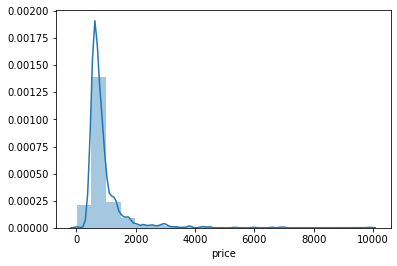

In [106]:
sns.distplot(realtor['price']/1000, hist=True, bins=20)

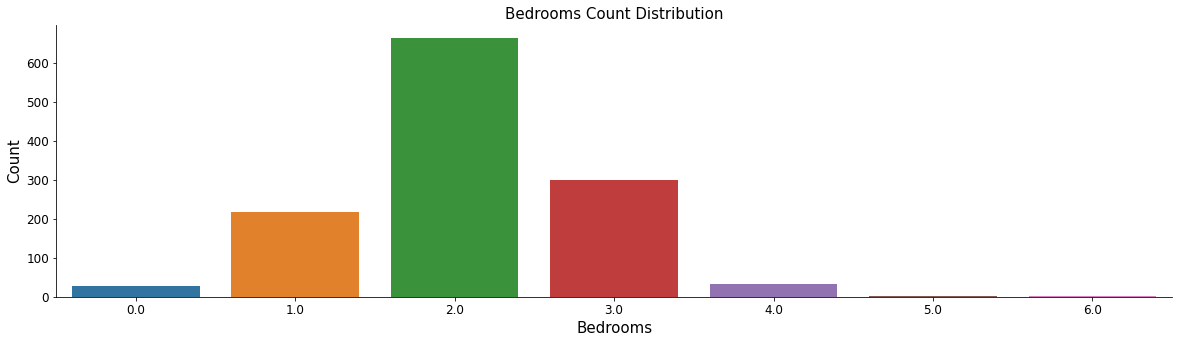

In [40]:
fig, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x = 'bedrooms', data = realtor, ax = ax1)
ax1.set_xlabel('Bedrooms', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Bedrooms Count Distribution', fontsize=15)
ax1.tick_params(labelsize=12)
sns.despine()

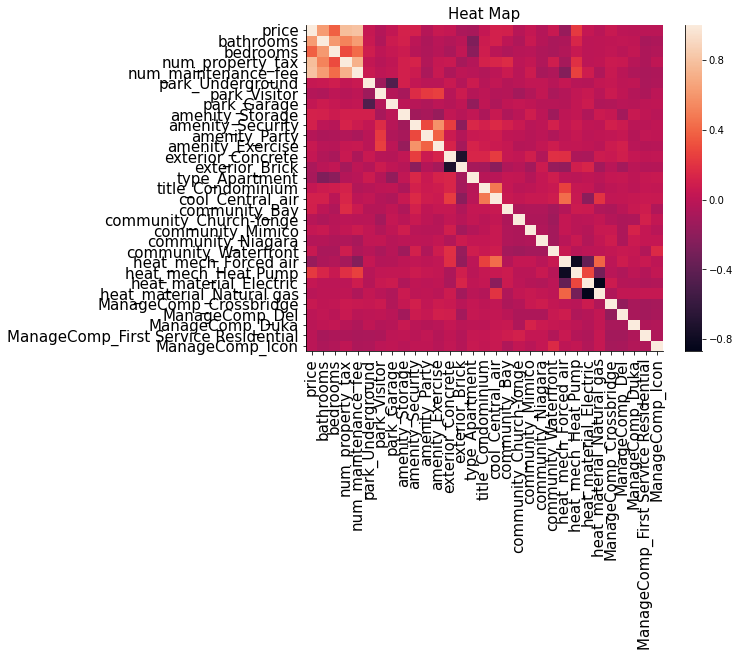

In [41]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.heatmap(realtor_encoded.corr())
ax1.tick_params(labelsize=15)
ax1.set_title('Heat Map', fontsize=15)
sns.despine()

### Model: Lasso/Random Forest

Train Test Split

In [42]:
X = realtor_encoded.drop("price", axis=1) # drop labels 
y = realtor_encoded["price"].copy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [107]:
log_lreg = LinearRegression()
log_lreg.fit(X_train,np.log(y_train))

LinearRegression()

In [87]:
!pip install mlxtend

#### Backward Selection

Reference: https://www.analyticsvidhya.com/blog/2021/04/backward-feature-elimination-and-its-implementation/
https://scikit-learn.org/0.24/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

scikit-learn does not seem to have a forward selection algorithm. However, it does provide recursive feature elimination, which is a greedy feature elimination algorithm similar to sequential backward selection.
https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-a-forward-selection-stepwise-regression-algorithm

In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(lreg, k_features=10, forward=False, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X_train, y_train)

In [89]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['bathrooms', 'num_property_tax', 'num_maintenance_fee', 'amenity_Party', 'title_Condominium', 'cool_Central_air', 'community_Waterfront', 'heat_mech_Forced air', 'ManageComp_Duka', 'ManageComp_First Service Residential']


In [110]:
sfs2 = sfs(log_lreg, k_features=10, forward=False, scoring='neg_mean_squared_error')
sfs2 = sfs2.fit(X_train, y_train)

In [111]:
feat_names2 = list(sfs2.k_feature_names_)
print(feat_names2)

['bathrooms', 'num_property_tax', 'num_maintenance_fee', 'amenity_Party', 'title_Condominium', 'cool_Central_air', 'community_Waterfront', 'heat_mech_Forced air', 'ManageComp_Duka', 'ManageComp_First Service Residential']


### Lasso Regression

In [95]:
from sklearn import linear_model
lassoReg = linear_model.Lasso()
lassoReg.fit(X_train,y_train)

Lasso()

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(max_depth=7, random_state=24)
rf_clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=24)

### LightGBM
Handle Categorical Variables

lgbm wont accept categorical data in object format or string format you have to convert that to categorical type

Reference: https://medium.com/analytics-vidhya/lightgbm-for-regression-with-categorical-data-b08eaff501d1

In [79]:
gbm_drop = ['city', 'Property Type','Building Type', 'Community Name', 'Title', 'Annual Property Taxes',
       'Parking Type', 'Building Amenities', 'Cooling', 'Heating Type',
       'Exterior Finish', 'Maintenance Fees', 'Maintenance Management Company',
       'rooms_info']
realtor_gbm = realtor.copy()
realtor_gbm = realtor_gbm.drop(gbm_drop, axis=1) 
realtor_gbm.head()

,price,bathrooms,bedrooms,num_property_tax,num_maintenance_fee,community,heat_mech,heat_material,ManageComp,park_Underground,...,park_Garage,amenity_Storage,amenity_Security,amenity_Party,amenity_Exercise,exterior_Concrete,exterior_Brick,type_Apartment,title_Condominium,cool_Central_air
0,1499999.0,2,2.0,3623.00,1528.00,Other,Forced air,Natural gas,Del,1,...,0,0,1,0,1,1,0,1,1,1
1,548800.0,1,1.0,1912.47,375.00,Other,Heat Pump,Electric,Other,0,...,0,1,0,1,1,0,1,1,1,1
2,939000.0,2,2.0,3207.82,1252.96,Church-Yonge,Heat Pump,Electric,Other,1,...,0,1,0,1,0,0,1,1,1,1
3,849000.0,2,2.0,3250.59,594.63,Waterfront,Forced air,Natural gas,Crossbridge,1,...,0,0,1,0,1,1,0,1,1,1
4,749000.0,1,2.0,2712.90,429.60,Waterfront,Forced air,Natural gas,Del,1,...,0,1,1,0,1,1,0,1,1,1


In [81]:
gbm_col_type = realtor_gbm.dtypes
obj_feat = gbm_col_type[gbm_col_type=='object'].index.tolist()
obj_feat

['community', 'heat_mech', 'heat_material', 'ManageComp']

In [82]:
## change categorical variable type from object to categorical
for feature in obj_feat:
     realtor_gbm[feature] = pd.Series( realtor_gbm[feature], dtype="category")

In [83]:
X2 =  realtor_gbm.drop("price", axis=1) # drop labels 
y2 =  realtor_gbm["price"].copy()

In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=24)

In [85]:
gbm = lgb.LGBMRegressor(learning_rate=0.05,n_estimators=100,seed=24,max_depth=3,min_child_weight = .9,
                             min_child_samples=40,num_leaves=50, objective='regression')

gbm.fit(X_train2, y_train2)

LGBMRegressor(learning_rate=0.05, max_depth=3, min_child_samples=40,
              min_child_weight=0.9, num_leaves=50, objective='regression',
              seed=24)

### Model Evaluation

#### RMSE

In [51]:
y_pred = rf_clf.predict(X_test)
test_RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
test_RMSE

422737.7348431038

In [94]:
print("LR train R square: %0.3f" % lreg.score(X_train, y_train))
print("LR test R square: %0.3f" % lreg.score(X_test, y_test))

LR train R square: 0.753
LR test R square: 0.744


In [108]:
print("LR with log transformation train R square: %0.3f" % log_lreg.score(X_train, np.log(y_train)))
print("LR test log transformation square: %0.3f" % log_lreg.score(X_test, np.log(y_test)))

LR with log transformation train R square: 0.686
LR test log transformation square: 0.642


In [52]:
print("RF train R square: %0.3f" % rf_clf.score(X_train, y_train))
print("RF test R square: %0.3f" % rf_clf.score(X_test, y_test))

RF train R square: 0.944
RF test R square: 0.778


In [96]:
print("Lasso train R square: %0.3f" % lassoReg.score(X_train, y_train))
print("Lasso test R square: %0.3f" % lassoReg.score(X_test, y_test))

Lasso train R square: 0.753
Lasso test R square: 0.744


In [86]:
print("LightGBM train R square: %0.3f" % gbm.score(X_train2, y_train2))
print("LightGBM test R square: %0.3f" % gbm.score(X_test2, y_test2))
# not perform well: maybe lightGBM is not a good regression algorithm

LightGBM train R square: 0.768
LightGBM test R square: 0.599


### Feature Selection

In [90]:
for name, importance in zip(X_train.columns.tolist(), rf_clf.feature_importances_):
    print('%s = %.3f' %(name, importance))

bathrooms = 0.052
bedrooms = 0.007
num_property_tax = 0.679
num_maintenance_fee = 0.221
park_Underground = 0.000
park_Visitor = 0.001
park_Garage = 0.000
amenity_Storage = 0.005
amenity_Security = 0.000
amenity_Party = 0.008
amenity_Exercise = 0.001
exterior_Concrete = 0.001
exterior_Brick = 0.002
type_Apartment = 0.001
title_Condominium = 0.000
cool_Central_air = 0.001
community_Bay = 0.001
community_Church-Yonge = 0.000
community_Mimico = 0.001
community_Niagara = 0.001
community_Waterfront = 0.005
heat_mech_Forced air = 0.002
heat_mech_Heat Pump = 0.001
heat_material_Electric = 0.001
heat_material_Natural gas = 0.001
ManageComp_Crossbridge = 0.002
ManageComp_Del = 0.001
ManageComp_Duka = 0.000
ManageComp_First Service Residential = 0.007
ManageComp_Icon = 0.000


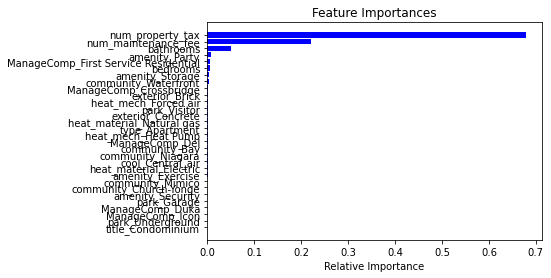

In [91]:
features = X_train.columns.tolist()
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [92]:
#### Select 10 most important features
new_feature = [features[i] for i in indices][-10:]
new_feature

['exterior_Brick',
 'ManageComp_Crossbridge',
 'community_Waterfront',
 'amenity_Storage',
 'bedrooms',
 'ManageComp_First Service Residential',
 'amenity_Party',
 'bathrooms',
 'num_maintenance_fee',
 'num_property_tax']

### Fit Model Again After select the Features

In [97]:
rf_clf2 = RandomForestRegressor(max_depth=7, random_state=24)
rf_clf2.fit(X_train[new_feature], y_train)

RandomForestRegressor(max_depth=7, random_state=24)

In [98]:
print("RF train R square: %0.3f" % rf_clf2.score(X_train[new_feature], y_train))
print("RF test R square: %0.3f" % rf_clf2.score(X_test[new_feature], y_test))

RF train R square: 0.942
RF test R square: 0.781


In [99]:
lassoReg2 = linear_model.Lasso()
lassoReg2.fit(X_train[new_feature],y_train)

Lasso()

In [100]:
print("Lasso train R square: %0.3f" % lassoReg2.score(X_train[new_feature], y_train))
print("Lasso test R square: %0.3f" % lassoReg2.score(X_test[new_feature], y_test))

Lasso train R square: 0.740
Lasso test R square: 0.753


In [103]:
lreg2 = LinearRegression()
lreg2.fit(X_train[feat_names], y_train)

LinearRegression()

In [104]:
print("LR train R square: %0.3f" % lreg2.score(X_train[feat_names], y_train))
print("LR test R square: %0.3f" % lreg2.score(X_test[feat_names], y_test))

LR train R square: 0.663
LR test R square: 0.617
